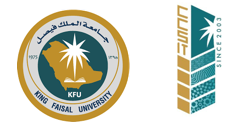

<h1><center>
King Faisal University <br>
College of Computer Sciences and Information Technology <br>
CS323: Digital Image Processing – Practical Class 
</h1>


<strong>
<center>[0921 - 323]: [Digital Image Processing]
<br><br>
<center>Section: [Male/Female]
<br><br><br><br>

<center>Lab [06]: [Morphological Image Processing]
<br><br><br><br>

<center> Date: [Feb 20, 2022]
<center> Time: [14:30 – 17:00]
<br><br>


<center> Instructor: []
</strong>

# Introduction

In this lab, we give an introduction to some of the available morphological techniques. In image processing, we use morphology with two types of sets of pixels objects and structuring elements (SEs). Typically, objects are defined as sets of foreground pixels. Structuring elements can
be specified in terms of both foreground and background pixels.  


These techniques can be used to enlarge/reduce image sizes, smooth and reduce noise, sharpen images, among others. 

**Objectives: **
* Implement different types of Morphological Image Processings techniques such as:
    * Erosion, Dilation, Opening, Closing, Boundary extraction, and Hole filling.
* Apply Morphological techniques(s) to enhance/exctract features from images.

**Tools/Software Requirement:**
*	Anaconda Navigator


**Lab Activity Description:**

Part 1: Morphological Image Processings techniques.
* Erosion
* Dilation 
* Opening and Closing
* Boundary extraction
* Hole filling 

Part 2: Lab Task.
*	Student solves programming questions using Python and OpenCV.


## Part 1: Morphological Image Processings techniques

In [17]:
import cv2 #openCv
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20)
    if len(image.shape) < 3: #GRAY SCALE IMAGE 
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

### Structure Elements

Structuring elements can be specified in terms of both foreground and background pixels. Each element is a small shape known as a structuring element (SE) that is passed through the pixels of an image and compared to the corresponding neighborhood of pixels. While passing SE, the comparison is basically a test of whether the SE “fits” within the neighborhood or “hits” the neighborhood. 

Some of the common shapes of SE includes rectangular shapre, cross shape, or oval shape. 

**Note:**  You can construct an arbitrary binary mask, and use it as the structuring element.

In [19]:
element = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize=(3,3))
print(element)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [20]:
element = cv2.getStructuringElement(shape = cv2.MORPH_CROSS, ksize=(3,3))
print(element)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


### Erosion

Erosion is a morphological operation that results in a reduction in the size of regions or images. 
It follows the following operation:
$A \circleddash B = \{z  \mid  (B)_{z}  \subseteq A\}$

In [21]:
from IPython.core.display import Video
Video("img/erosion.mp4", embed=True)
#Animation Source: https://www.youtube.com/watch?v=3IJ8RFtlDLY

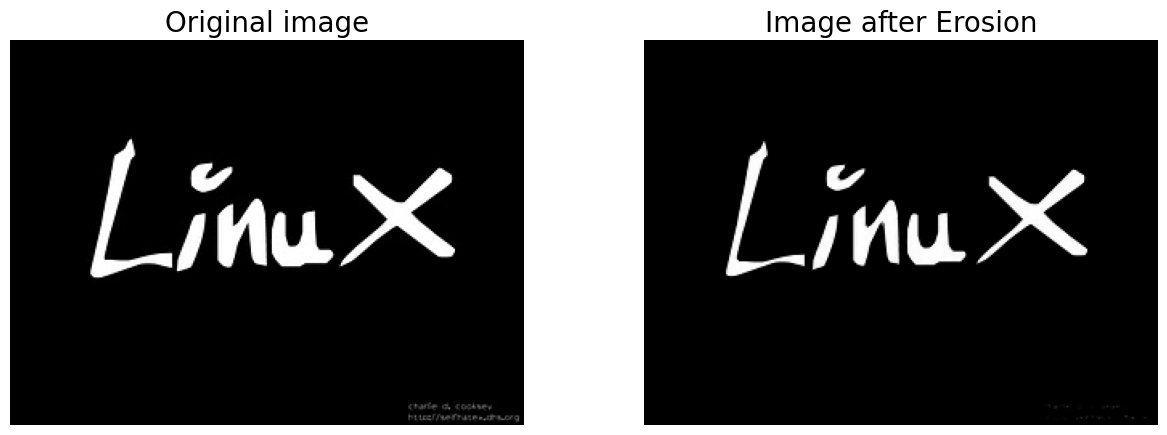

In [22]:
src = cv2.imread("img/LinuxLogo.jpg", cv2.IMREAD_GRAYSCALE)
erosion_dst = cv2.erode(src, element)
plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(src, 'Original image')
plt.subplot(122), plot_image(erosion_dst,'Image after Erosion')

plt.show()

### Dilation

Erosion is a morphological operation that results in an enlargement in the size of regions or images. 
It follows the following operation:
$A \oplus B = \{z  \mid  ( \hat{B} )_{z}  \bigcap A \neq \phi \} $

In [23]:
from IPython.core.display import Video
Video("img/dilation.mp4", embed=True)
#Animation Source: https://www.youtube.com/watch?v=3IJ8RFtlDLY

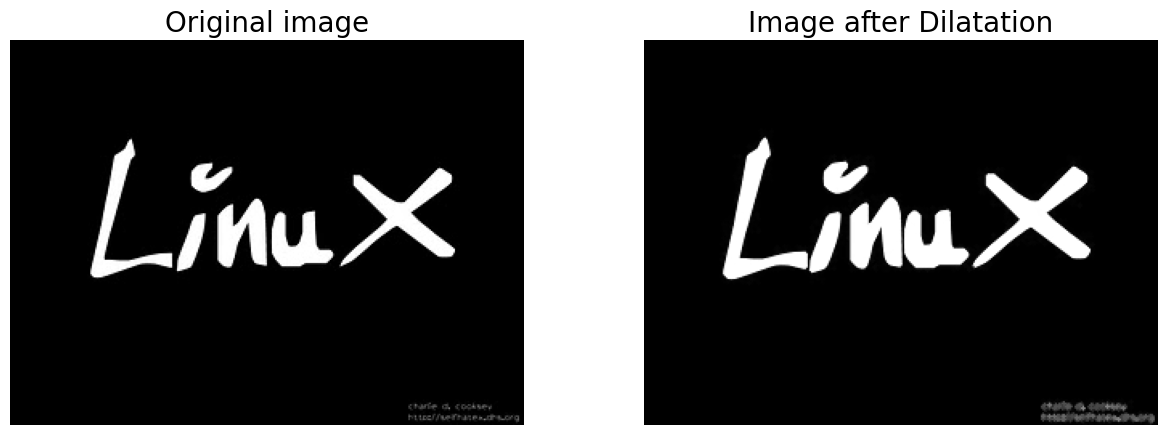

In [24]:
src = cv2.imread("img/LinuxLogo.jpg", cv2.IMREAD_GRAYSCALE)
dilatation_dst = cv2.dilate(src, element)
plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(src, 'Original image')
plt.subplot(122), plot_image(dilatation_dst,'Image after Dilatation')

plt.show()

### Opening and Closing

Opening is smoothes the contour of an object, breaks narrow isthmuses, and eliminates thin protrusions. Closing also tends to smooth sections of contours, but, as opposed to opening, it generally fuses narrow
breaks and long thin gulfs, eliminates small holes, and fills gaps in the contour.

![opening_and_closing](img/opening_and_closing.png)
Image Credit: Introduction to Computer Vision Course, Udacity

### Morphological Opening

Morphological opening involves the application of erosion, followed by dilation as shown in the following equation <br>

$ A \circ B = (A \circleddash B) \oplus B $

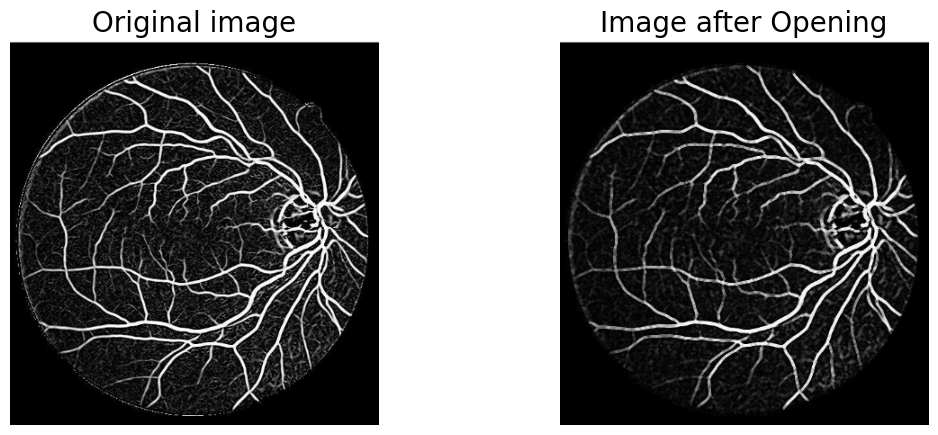

In [25]:
src = cv2.imread("img/img_2.png", cv2.IMREAD_GRAYSCALE)
element = cv2.getStructuringElement(shape = cv2.MORPH_CROSS, ksize=(3,3))
erosion_dst = cv2.erode(src, element)
dilatation_dst = cv2.dilate(erosion_dst, element)
plt.figure(figsize=(13,5))
plt.subplot(121), plot_image(src, 'Original image')
plt.subplot(122), plot_image(dilatation_dst,'Image after Opening')

plt.show()

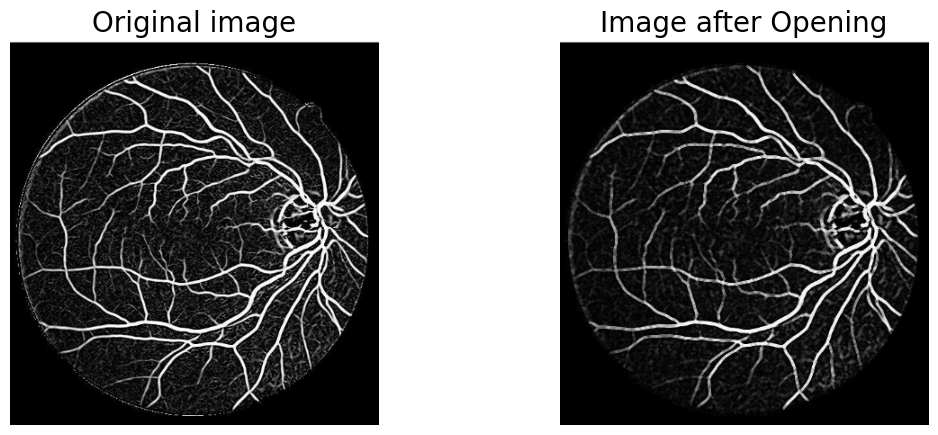

In [26]:
#Using OpenCV function 
src = cv2.imread("img/img_2.png", cv2.IMREAD_GRAYSCALE)
element = cv2.getStructuringElement(shape = cv2.MORPH_CROSS, ksize=(3,3))
opening = cv2.morphologyEx(src, cv2.MORPH_OPEN, element)
plt.figure(figsize=(13,5))
plt.subplot(121), plot_image(src, 'Original image')
plt.subplot(122), plot_image(opening,'Image after Opening')
plt.show()

### Morphological Closing

Morphological opening involves the application of dilation, followed by erosion as shown in the following equation <br>

$ A \bullet B = (A \oplus B) \circleddash B $

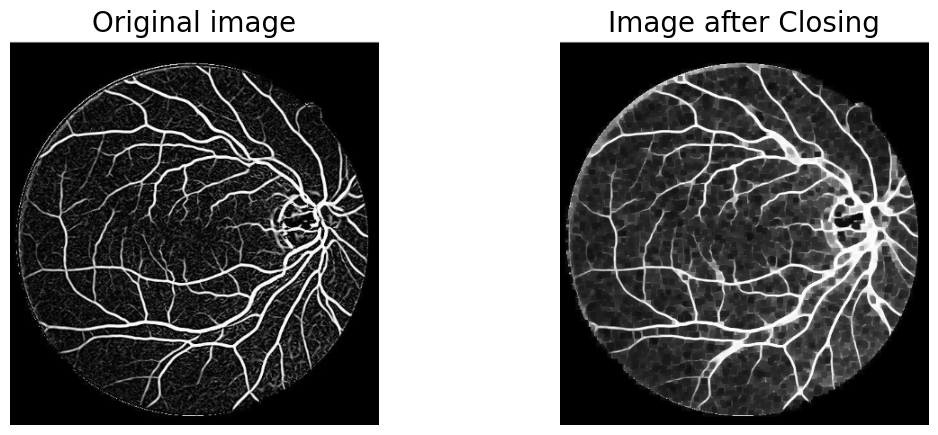

In [27]:
src = cv2.imread("img/img_2.png", cv2.IMREAD_GRAYSCALE)
element = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize=(5,5))
dilatation_dst = cv2.dilate(src, element)
erosion_dst = cv2.erode(dilatation_dst, element)
plt.figure(figsize=(13,5))
plt.subplot(121), plot_image(src, 'Original image')
plt.subplot(122), plot_image(erosion_dst,'Image after Closing')

plt.show()

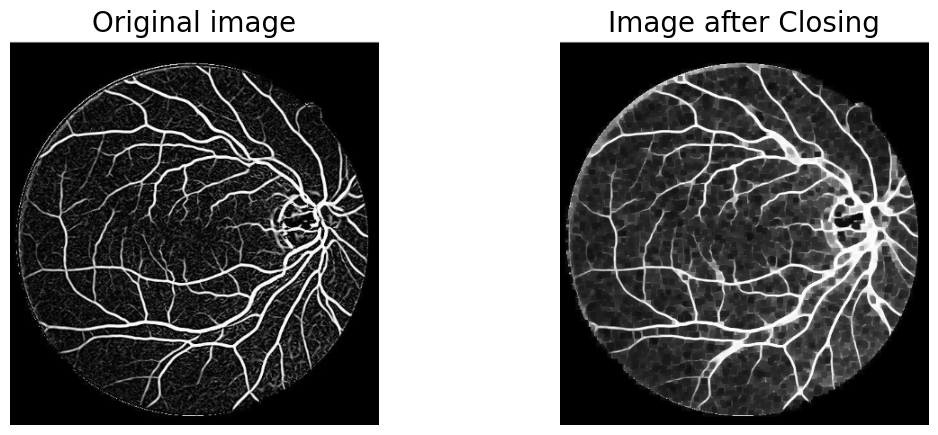

In [28]:
#Using OpenCV function 
src = cv2.imread("img/img_2.png", cv2.IMREAD_GRAYSCALE)
element = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize=(5,5))
closing = cv2.morphologyEx(src, cv2.MORPH_CLOSE, element)
plt.figure(figsize=(13,5))
plt.subplot(121), plot_image(src, 'Original image')
plt.subplot(122), plot_image(closing,'Image after Closing')
plt.show()

### Boundary Extraction

The boundary of a set A of foreground pixels, denoted by $\beta(A)$, can be obtained by first eroding A by a suitable structuring element B, and then performing the set difference between A and its erosion. The equation that represents boundary extraction can be expressed as follows, <br> 

$\beta(A) = A - (A \circleddash B)$


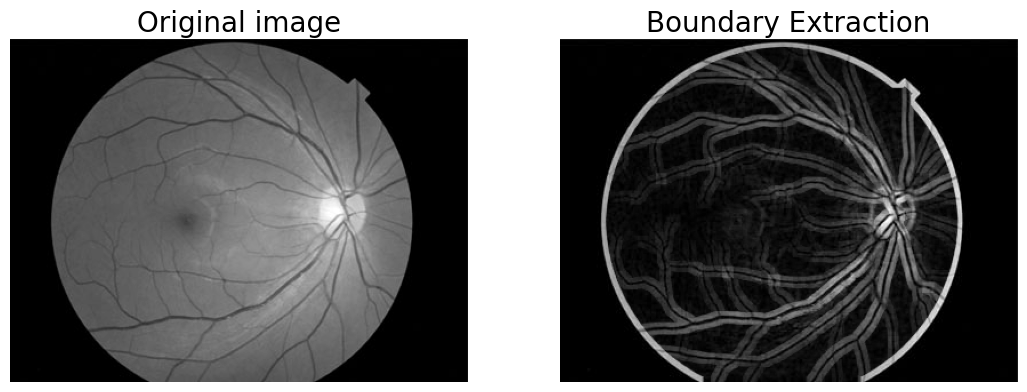

In [29]:
src = cv2.imread("img/img_3.jpg", cv2.IMREAD_GRAYSCALE)
element = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize=(9,9))
erosion_dst = cv2.erode(src, element)
result = src - erosion_dst
plt.figure(figsize=(13,5))
plt.subplot(121), plot_image(src, 'Original image')
plt.subplot(122), plot_image(result,'Boundary Extraction')

plt.show()

### Hole Filling

A hole can be defined as a background region surrounded by a connected border of foreground pixels. In hole filling, we try to find connected objects and fill the gaps between them.

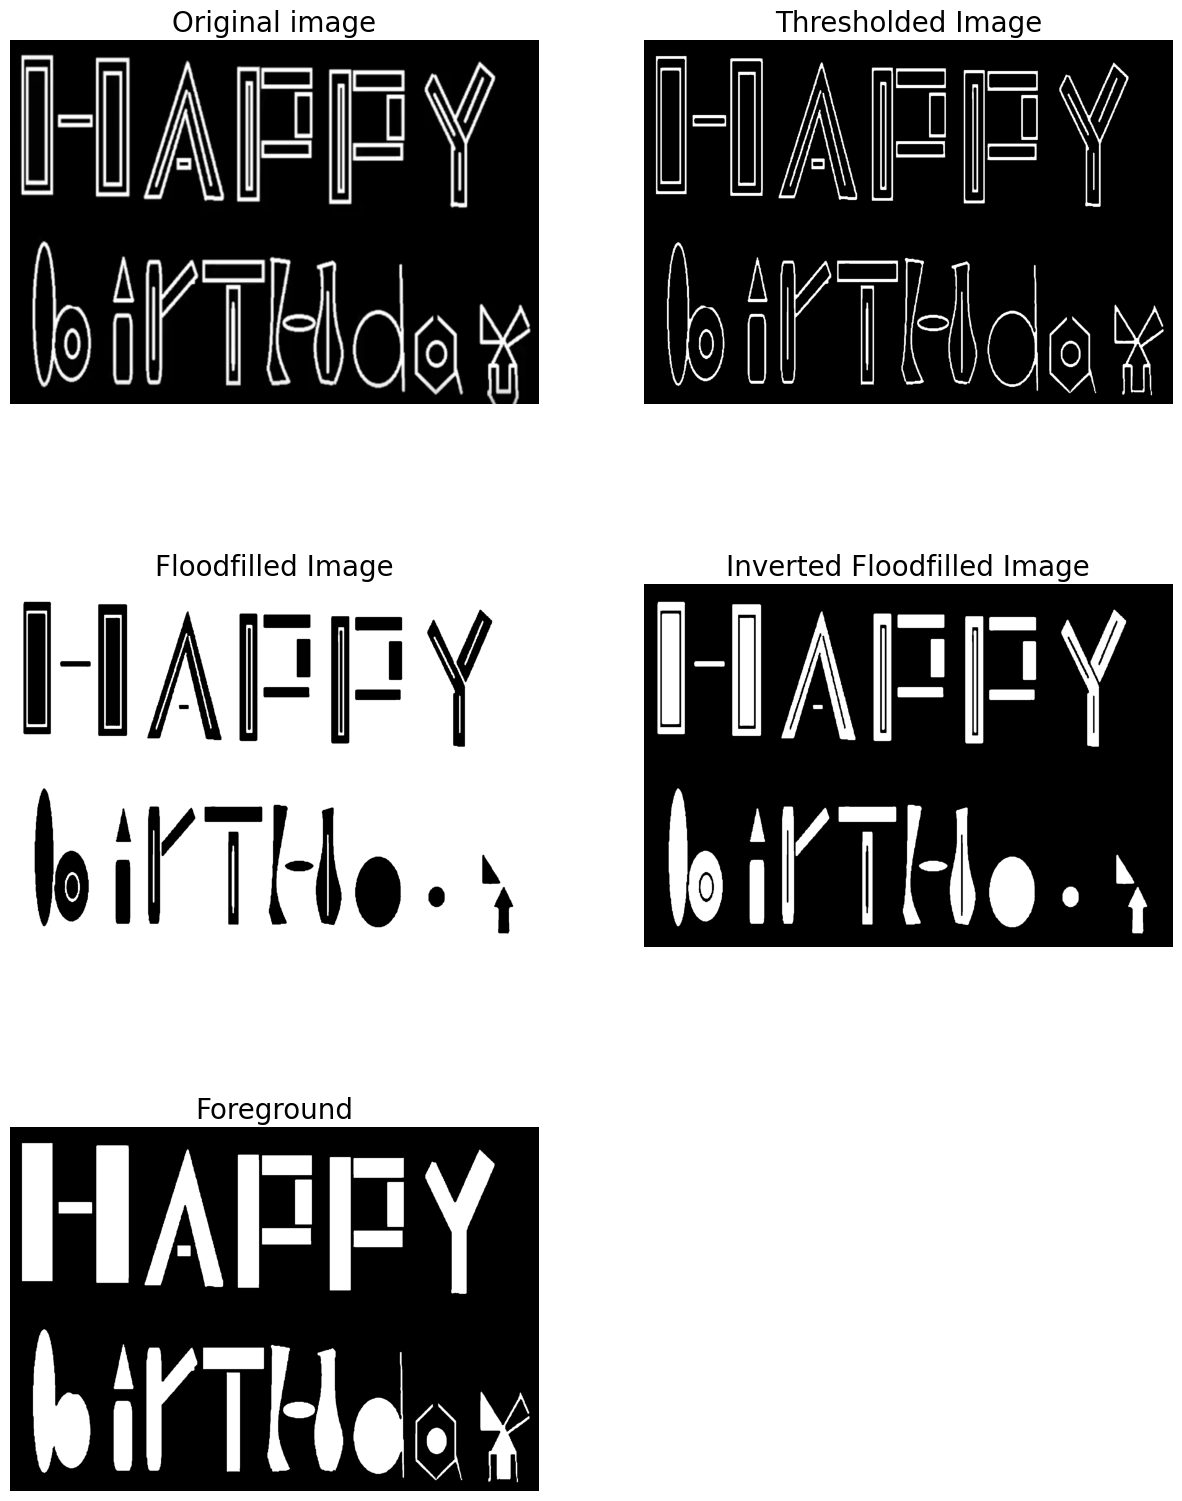

In [30]:
im = cv2.imread('img/Hole_Filling.png', cv2.IMREAD_GRAYSCALE)
th, im_th = cv2.threshold(im, 220, 255, cv2.THRESH_BINARY) #Threshold the image 

# Mask used to flood filling.
h, w = im_th.shape
mask = np.zeros((h+2, w+2), np.uint8) #Padding the image 

im_floodfill = im_th.copy()

cv2.floodFill(im_floodfill, mask, (0,0), 255) #Loop through the border pixels and if they're black, floodFill from there

# Invert floodfilled image - convert black portions to white and vice versa
im_floodfill_inv = cv2.bitwise_not(im_floodfill)


# Combine (OR) the two images to get the foreground.
im_out = im_th | im_floodfill_inv


plt.figure(figsize=(15,20))
plt.subplot(321), plot_image(im, 'Original image')
plt.subplot(322), plot_image(im_th,'Thresholded Image')
plt.subplot(323), plot_image(im_floodfill, 'Floodfilled Image')
plt.subplot(324), plot_image(im_floodfill_inv,'Inverted Floodfilled Image')
plt.subplot(325), plot_image(im_out, 'Foreground')
plt.show()

#Code credit: Satya Mallick 

## Part 2: Lab Tasks

#### Task 1: Given the image on the left, do the necessary operation to convert it to the image of the right. 

![task1](img/task_1.png)

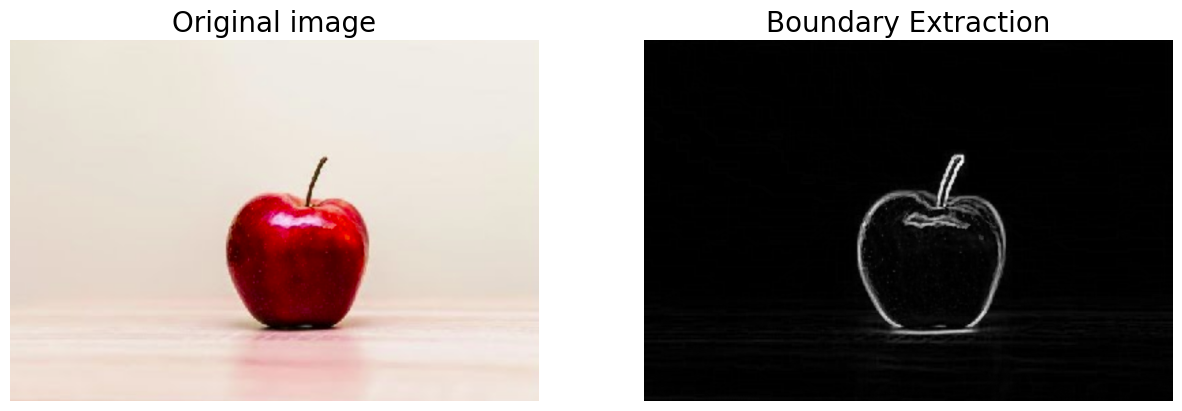

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path = 'img/task_1_input.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(9,9))
erosion_dst = cv2.erode(img_gray, kernel)
result = img_gray - erosion_dst

plt.figure(figsize=(15,20))
plt.subplot(321), plot_image(img_rgb, 'Original image')
plt.subplot(322), plot_image(result,'Boundary Extraction')
plt.show()

#### Task 2: Given the image on the left, do the necessary operation to convert it to the image of the right. 

![task1](img/task_2.png)

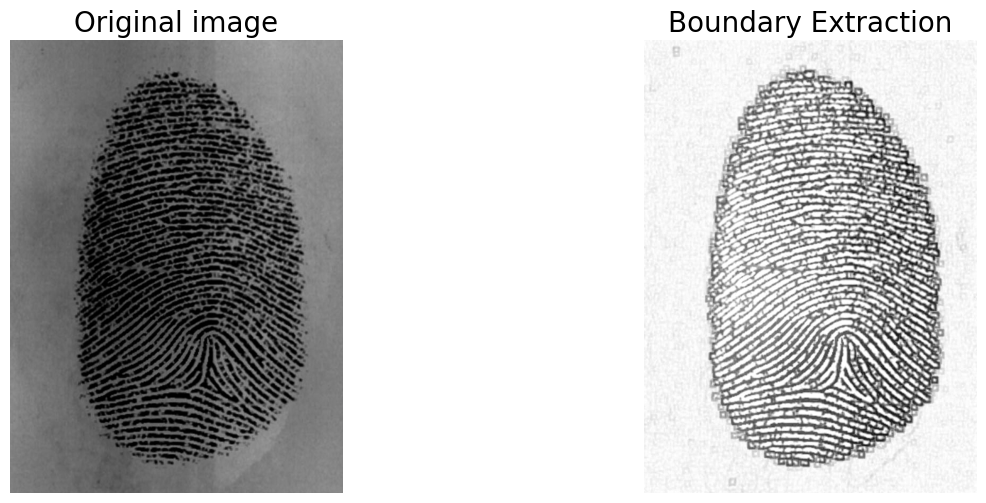

In [46]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img_path = 'img/task_2_input.png'
img_rgb = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

SE = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(9,9))
erosion = cv2.erode(img_gray, SE)
result = img_gray - erosion
negative = 255 - result

plt.figure(figsize=(15,20))
plt.subplot(321), plot_image(img_rgb, 'Original image')
plt.subplot(322), plot_image(negative,'Boundary Extraction')
plt.show()